## Mapping Ghana's Health Infrastrucuture

In [7]:
# import libraries
import pandas as pd
import numpy as np
import geopandas as gpd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [11]:
# Load the dataset and create a DataFrame from the data
data = pd.read_csv("health-facilities-gh.csv")

# Convert the DataFrame to a GeoDataFrame
facilities = gpd.GeoDataFrame(data, geometry=gpd.points_from_xy(data.Longitude, data.Latitude))

# Set the coordinate reference system (CRS) to EPSG 4326
facilities.crs = {'init': 'epsg:4326'}

# View the first five rows of the GeoDataFrame
facilities.head()

C:\Users\Sam\Anaconda3\envs\climada_env\lib\site-packages\pyproj\crs\crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


,Region,District,FacilityName,Type,Town,Ownership,Latitude,Longitude,geometry
0,Ashanti,Offinso North,A.M.E Zion Clinic,Clinic,Afrancho,CHAG,7.40801,-1.96317,POINT (-1.96317 7.40801)
1,Ashanti,Bekwai Municipal,Abenkyiman Clinic,Clinic,Anwiankwanta,Private,6.46312,-1.58592,POINT (-1.58592 6.46312)
2,Ashanti,Adansi North,Aboabo Health Centre,Health Centre,Aboabo No 2,Government,6.22393,-1.34982,POINT (-1.34982 6.22393)
3,Ashanti,Afigya-Kwabre,Aboabogya Health Centre,Health Centre,Aboabogya,Government,6.84177,-1.61098,POINT (-1.61098 6.84177)
4,Ashanti,Kwabre,Aboaso Health Centre,Health Centre,Aboaso,Government,6.84177,-1.61098,POINT (-1.61098 6.84177)


In [12]:
# Load a GeoDataFrame containing regions in Ghana
regions = gpd.read_file("Map_of_Regions_in_Ghana.shp")
print(regions.crs)

None


In [13]:
# Check the datatype of each attribute
facilities.dtypes

Region            object
District          object
FacilityName      object
Type              object
Town              object
Ownership         object
Latitude         float64
Longitude        float64
geometry        geometry
dtype: object

In [29]:
#Data cleaning
# Format the dataset

facilities['Type'] = facilities['Type'].replace(['Clinic', 'clinic', 'Polyclinic'], 'Clinic')
facilities['Type'] = facilities['Type'].replace(['CHPS', 'CPHS'], 'CHPS')
facilities['Type'] = facilities['Type'].replace(['Training Institution', 'Teaching Hospital', 'Research Institution'], 'Teaching')
facilities['Type'] = facilities['Type'].replace(['Maternity Home', 'RCH', 'DHD'], 'Maternity')
facilities['Type'] = facilities['Type'].replace(['Hospital', 'Psychiatric Hospital'], 'Hospital')
facilities['Type'] = facilities['Type'].replace(['Municipal Health Directorate', 'Municipal Hospital', 'Municipal  Health Directorate', 'Regional Hospital', 'Regional Health Directorate', 'District Hospital', 
                                     'District Health Directorate', 'Metropolitan Hospital', 
                                     'Metropolitan Health Directorate'], 'GHS')
facilities['Type'] = facilities['Type'].replace(['Health Centre', 'Centre'], 'Health Centre')
facilities['Type'] = facilities['Type'].replace('Others', 'Other')
facilities['Ownership'] = facilities['Ownership'].replace(['Private', 'Metropolitan Hospital', 'Metropolitan Health Directorate', 'private', 
                                               'NGO', 'Maternity Home', 'Islamic', 'Muslim', 'Mission', 'Clinic'], 'Private')
facilities['Ownership'] = facilities['Ownership'].replace(['Government', 'government'], 'Government')


In [15]:
# Group most common health facility in each region
pd.DataFrame(data.groupby(['Region', 'Type']).size()
            .unstack()
            .idxmax(axis = 1)) 

,0
Region,
Ashanti,Clinic
Brong Ahafo,Clinic
Central,CHPS
Eastern,Maternity
Greater Accra,Clinic
Northern,Health Centre
Upper East,CHPS
Upper West,CHPS
Volta,Health Centre


In [16]:
# Total number of each type of facility
facility_types = facilities['Type'].value_counts()
print(facility_types) 

Clinic           1189
Health Centre     788
CHPS              653
Maternity         522
Hospital          280
GHS               214
Teaching           79
Other              31
Name: Type, dtype: int64


Text(0.5, 1.0, 'Number of each health facility type')

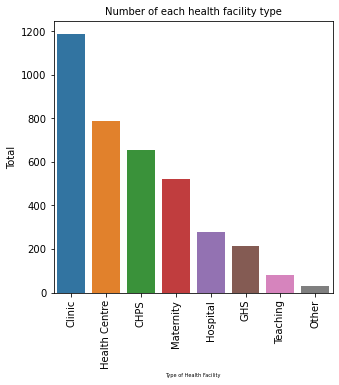

In [25]:
# Visualize the total type of facilities
plt.figure(figsize = (5, 5))
sns.barplot(x = facility_types.index, y = facility_types.values)
plt.xticks(rotation = 90, fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('Type of Health Facility', fontsize = 5)
plt.ylabel('Total', fontsize = 10)
plt.title('Number of each health facility type', fontsize = 10)

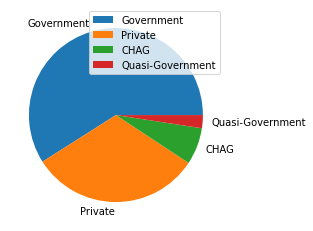

In [26]:
# Who owns what fraction of the facilities
labels = data['Ownership'].value_counts().keys().tolist()
values = data['Ownership'].value_counts().values.tolist()
plt.pie(values, labels= labels)
plt.legend()
plt.show()

<AxesSubplot:>

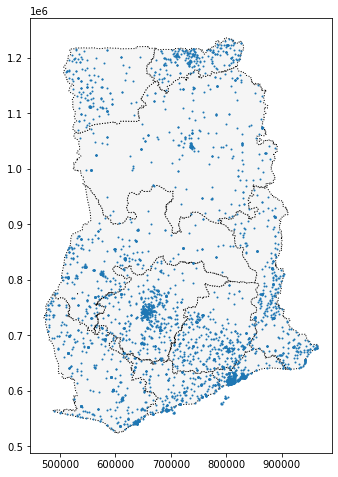

In [27]:
# Create a map
ax = regions.plot(figsize=(8,8), color='whitesmoke', linestyle=':', edgecolor='black')
facilities.to_crs(epsg=32630).plot(markersize=1, ax=ax)

In [28]:
regions.loc[:, "AREA"] = regions.geometry.area / 10**6

print("Area of Ghana: {} square kilometers".format(regions.AREA.sum()))
print("CRS:", regions.crs)
regions.head()

Area of Ghana: 239584.5760055668 square kilometers
CRS: None


,geometry,AREA
0,"POLYGON ((686446.075 842986.894, 686666.193 84...",24379.017777
1,"POLYGON ((549970.457 968447.094, 550073.003 96...",40098.168231
2,"POLYGON ((603176.584 695877.238, 603248.424 69...",9665.626760
3,"POLYGON ((807307.254 797910.553, 807311.908 79...",18987.625847
4,"POLYGON ((858081.638 676424.913, 858113.115 67...",3706.511145
